In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

In [169]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [170]:
df.shape

(8807, 12)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [172]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [173]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
categorical

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']

<AxesSubplot:>

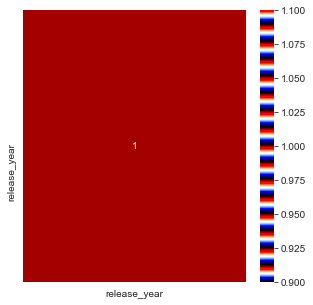

In [174]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True , cmap="flag_r")

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

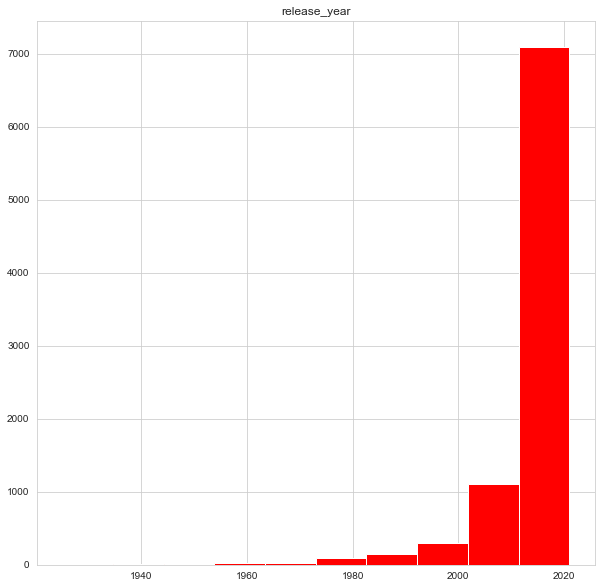

In [175]:
df.hist(figsize=(10,10),color='red')  

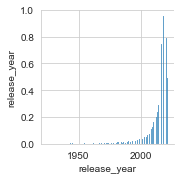

In [176]:
sns.pairplot(data=df)

#### Finding all null value :

In [177]:
df.isnull().value_counts()

show_id  type   title  director  cast   country  date_added  release_year  rating  duration  listed_in  description
False    False  False  False     False  False    False       False         False   False     False      False          5332
                       True      False  False    False       False         False   False     False      False          1958
                       False     True   False    False       False         False   False     False      False           415
                                 False  True     False       False         False   False     False      False           364
                       True      False  True     False       False         False   False     False      False           311
                                 True   False    False       False         False   False     False      False           256
                                        True     False       False         False   False     False      False            96
                

<AxesSubplot:>

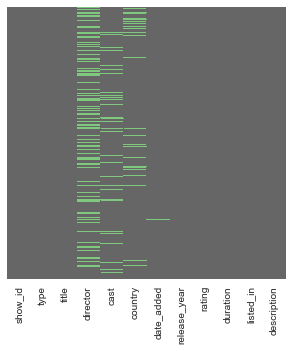

In [178]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Accent_r')

In [179]:
df['director'].isnull().value_counts()

False    6173
True     2634
Name: director, dtype: int64

In [180]:
df['cast'].isnull().value_counts()

False    7982
True      825
Name: cast, dtype: int64

In [181]:
df['country'].isnull().value_counts()

False    7976
True      831
Name: country, dtype: int64

In [182]:
df['rating'].isnull().value_counts()

False    8803
True        4
Name: rating, dtype: int64

In [183]:
df['duration'].isnull().value_counts()

False    8804
True        3
Name: duration, dtype: int64

In [184]:
df['date_added'].isnull().value_counts()

False    8797
True       10
Name: date_added, dtype: int64

## Question 

### Show_id 

#### Find the total number of show_id and find unique within all films 

In [185]:
df['show_id'].count()

8807

In [186]:
df['show_id'].value_counts()

s7565    1
s5201    1
s6677    1
s7822    1
s4740    1
        ..
s6194    1
s8438    1
s5084    1
s664     1
s2174    1
Name: show_id, Length: 8807, dtype: int64

In [187]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [188]:
df.drop('show_id',inplace=True, axis=1)

In [189]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Type 

#### What are the different types in netflix and calegorise accordingly



In [190]:
a1=pd.DataFrame(df['type'].value_counts())
a1

,type
Movie,6131
TV Show,2676


<AxesSubplot:xlabel='type', ylabel='count'>

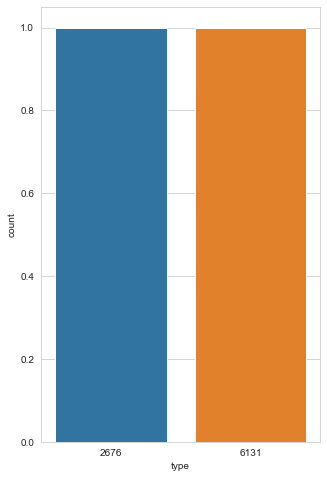

In [191]:
plt.figure(figsize = (5, 8)) 
sns.countplot(x='type',data = a1) 

In [192]:
b1 = pd.DataFrame(df['title']).head(1)
b1

,title
0,Dick Johnson Is Dead


In [193]:
c1 = pd.DataFrame(df['type']).head(1)
c1

,type
0,Movie


In [194]:
frame=(b1,c1)
result = pd.concat(frame)
display(result)


,title,type
0,Dick Johnson Is Dead,NaN
0,NaN,Movie


In [195]:
a3 = df[df['type']=='Movie'].head(8807).iloc[:1]
a3

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [196]:
a3['director'].value_counts().head(1)

Kirsten Johnson    1
Name: director, dtype: int64

In [197]:
a4 = df[df['type']=='TV Show'].head(8807)
a4

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [198]:
a4['director'].value_counts()

Alastair Fothergill    3
Stan Lathan            2
Ken Burns              2
Rob Seidenglanz        2
Shin Won-ho            2
                      ..
Simon Frederick        1
Joshua Zeman           1
Obi Emelonye           1
Padraic McKinley       1
Carla Barros           1
Name: director, Length: 222, dtype: int64

#### What kind of ratings given by netfix to movie and which movies has the good rating 

In [199]:
a3['rating'].value_counts()

# Only 41 movies haave good rating i.e every can watch


PG-13    1
Name: rating, dtype: int64

In [200]:
a3['rating'].value_counts().count()

1

#### What kind of ratings given by netfix to tv_show and which tv_show has the good rating 

In [201]:
a4['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

In [202]:
a4['rating'].value_counts().count()

9

### Director 

#### Find all the title and there director and find which director had done more movies

In [203]:
b2 = pd.DataFrame(df['type']).value_counts()
b2

type   
Movie      6131
TV Show    2676
dtype: int64

In [204]:
df['director'].value_counts()

Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Suhas Kadav                  16
Marcus Raboy                 16
Jay Karas                    14
                             ..
Paul Solet, Rick Benattar     1
Michael Tolajian              1
Carlos Bolado                 1
Barney Clay                   1
Amol Palekar                  1
Name: director, Length: 4528, dtype: int64

In [205]:
m = pd.DataFrame(df['director'])

In [206]:
m1 = pd.DataFrame(df['title'])

In [207]:
"""plt.figure(figsize=(100,100))
sns.set_style('whitegrid')
sns.countplot(y='director',data=df,palette='viridis_r')"""

"plt.figure(figsize=(100,100))\nsns.set_style('whitegrid')\nsns.countplot(y='director',data=df,palette='viridis_r')"

In [208]:
"""plt.figure(figsize=(12, 7))
sns.boxplot(x='title',y='year',data=df,palette='winter')"""

"plt.figure(figsize=(12, 7))\nsns.boxplot(x='title',y='year',data=df,palette='winter')"

In [209]:
df[df['director']=='Rajiv Chilaka'].head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...


In [210]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [211]:
g = pd.DataFrame(df['director'])
g.dropna().drop_duplicates(keep='first').head(10)

,director
0,Kirsten Johnson
2,Julien Leclercq
5,Mike Flanagan
6,"Robert Cullen, José Luis Ucha"
7,Haile Gerima
8,Andy Devonshire
9,Theodore Melfi
11,Kongkiat Komesiri
12,Christian Schwochow
13,Bruno Garotti


In [212]:
df['director'].value_counts().count()

4528

### Country 

In [213]:
df['country'].value_counts()

United States                     2818
India                              972
United Kingdom                     419
Japan                              245
South Korea                        199
                                  ... 
West Germany                         1
France, Iran, United States          1
India, Australia                     1
Uruguay, Argentina, Spain            1
Germany, United States, Sweden       1
Name: country, Length: 748, dtype: int64

In [214]:
df['country'].dropna().count() 

7976

In [215]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [216]:
a = pd.DataFrame(df['country'])
a.dropna().drop_duplicates(keep='first').head(10)

,country
0,United States
1,South Africa
4,India
7,"United States, Ghana, Burkina Faso, United Kin..."
8,United Kingdom
12,"Germany, Czech Republic"
17,Mexico
21,Turkey
25,Australia
29,"United States, India, France"


In [217]:
df['country'].value_counts().count()

748

<AxesSubplot:xlabel='count', ylabel='country'>

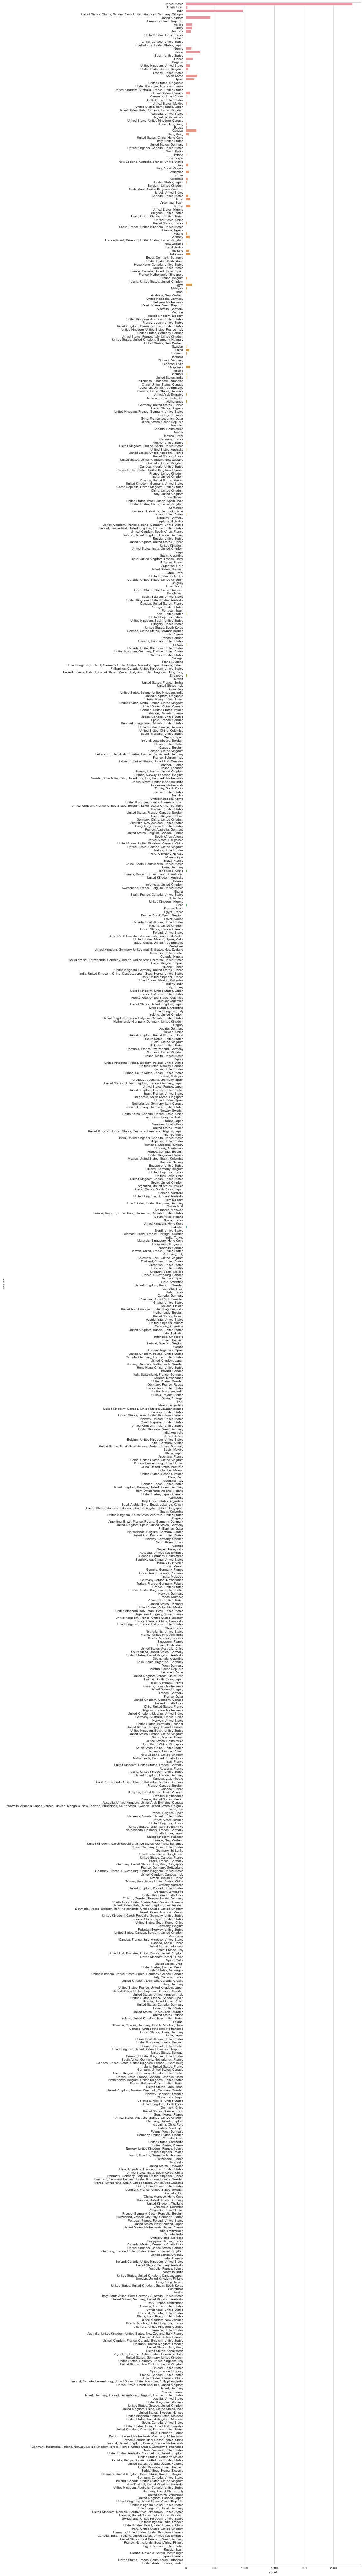

In [218]:
plt.figure(figsize = (10, 150)) 
sns.countplot(y='country',data=df)

In [219]:
df.drop('country',inplace=True, axis=1)

In [220]:
df.head(1)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


### Cast 

In [221]:
df['cast'].value_counts()

David Attenborough                                                                                                                                                                                                                  19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                                             14
Samuel West                                                                                                                                                                                                                         10
Jeff Dunham                                                                                                                                                                                                                          7
David Spade, London Hughes, Fortune Feimster                                

In [222]:
df['cast'].isna().value_counts()

False    7982
True      825
Name: cast, dtype: int64

In [223]:
b5 = pd.DataFrame(df['cast'])
b5.dropna()

,cast
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
...,...
8801,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [224]:
b5.drop_duplicates(keep='first').head()

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."


In [225]:
df['cast'].value_counts().count()

7692

### date_added 

In [226]:
df['date_added'].value_counts()

January 1, 2020        109
November 1, 2019        89
March 1, 2018           75
December 31, 2019       74
October 1, 2018         71
                      ... 
 September 8, 2015       1
May 31, 2017             1
August 21, 2021          1
 September 16, 2018      1
November 17, 2016        1
Name: date_added, Length: 1767, dtype: int64

In [227]:
a6 = pd.DataFrame(df['date_added'])
a6.dropna().drop_duplicates(keep='first').head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
11,"September 23, 2021"
13,"September 22, 2021"
22,"September 21, 2021"


In [228]:
a6.count()

date_added    8797
dtype: int64

In [229]:
a6.value_counts().count()

1767

In [230]:
bydate = df.groupby(by='date_added').count()
bydate.head(10)

,type,title,director,cast,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,
"April 15, 2018",1,1,0,0,1,1,1,1,1
"April 16, 2019",1,1,0,1,1,1,1,1,1
"April 17, 2016",1,1,0,1,1,1,1,1,1
"April 20, 2017",1,1,0,1,1,1,1,1,1
"April 4, 2017",1,1,0,1,1,1,1,1,1
"August 1, 2017",1,1,0,1,1,1,1,1,1
"August 13, 2018",1,1,0,1,1,1,1,1,1
"August 21, 2017",1,1,0,1,1,1,1,1,1
"August 4, 2017",3,3,1,2,3,3,3,3,3


In [231]:
df.head()

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Release_year 

In [232]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [233]:
df['release_year'].value_counts().count()

74

<AxesSubplot:xlabel='count', ylabel='release_year'>

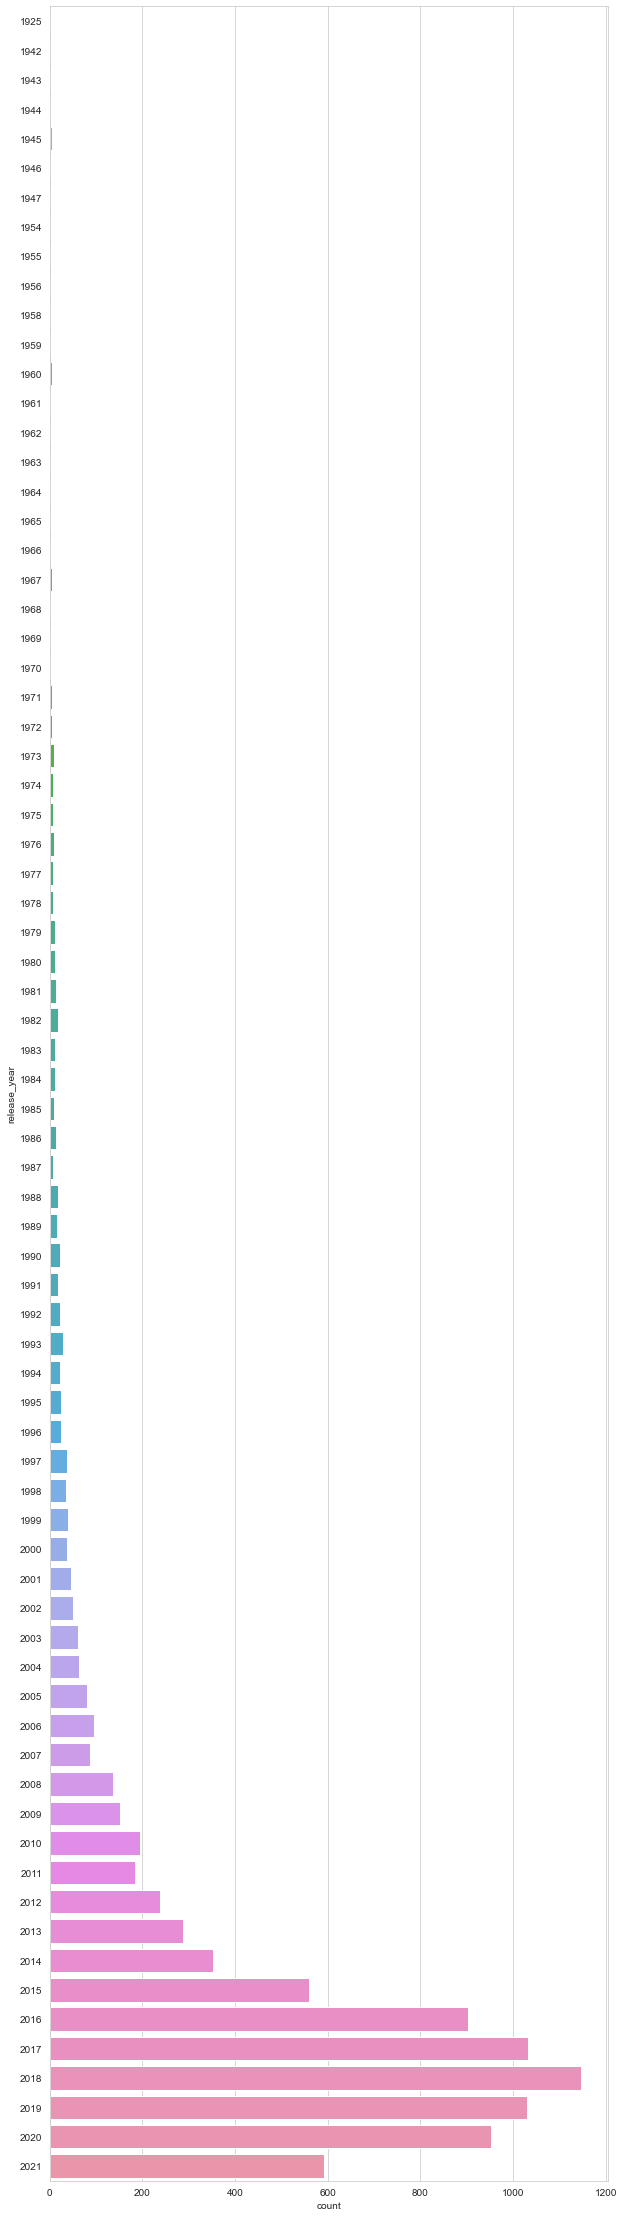

In [234]:
plt.figure(figsize = (10, 40)) 
sns.countplot(y='release_year',data=df)

### Rating 

In [235]:
df['rating'].count()

8803

In [236]:
df['rating'].value_counts().head()

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

In [237]:
a8 = pd.DataFrame(df['rating'])
a8.dropna().drop_duplicates(keep='first').head(10)

,rating
0,PG-13
1,TV-MA
6,PG
8,TV-14
13,TV-PG
23,TV-Y
34,TV-Y7
46,R
66,TV-G
107,G


In [238]:
a8.value_counts().count()

17

<AxesSubplot:xlabel='rating', ylabel='count'>

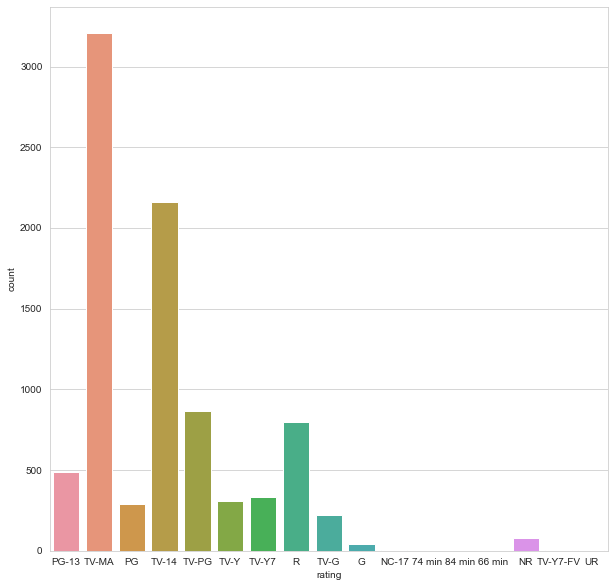

In [239]:
plt.figure(figsize = (10,10 )) 
sns.countplot(x='rating',data=df)

### Duration

In [240]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [241]:
df['duration'].value_counts().head()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64

In [242]:
a9 = pd.DataFrame(df['duration'])
a9.dropna().drop_duplicates(keep='first').head(10)

,duration
0,90 min
1,2 Seasons
2,1 Season
6,91 min
7,125 min
8,9 Seasons
9,104 min
12,127 min
15,4 Seasons
16,67 min


In [243]:
df['duration'].value_counts().count()

220

<AxesSubplot:xlabel='count', ylabel='duration'>

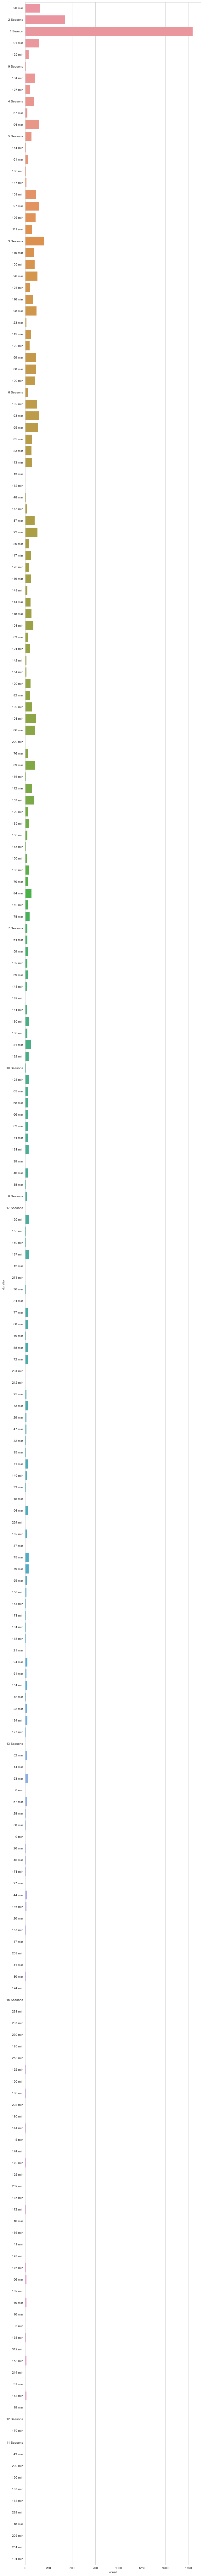

In [244]:
plt.figure(figsize = (10, 150)) 
sns.countplot(y='duration',data=df)

### Listed_in 

In [245]:
df['listed_in'].value_counts()

Dramas, International Movies                                 362
Documentaries                                                359
Stand-Up Comedy                                              334
Comedies, Dramas, International Movies                       274
Dramas, Independent Movies, International Movies             252
                                                            ... 
Cult Movies, Independent Movies, Thrillers                     1
Romantic TV Shows, Spanish-Language TV Shows, TV Comedies      1
Anime Features, Music & Musicals                               1
TV Comedies, TV Horror, TV Thrillers                           1
Romantic TV Shows, Teen TV Shows                               1
Name: listed_in, Length: 514, dtype: int64

In [246]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [247]:
a8 = pd.DataFrame(df['listed_in'])
a8.dropna().drop_duplicates(keep='first').head(10)

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
5,"TV Dramas, TV Horror, TV Mysteries"
6,Children & Family Movies
7,"Dramas, Independent Movies, International Movies"
8,"British TV Shows, Reality TV"
9,"Comedies, Dramas"


In [248]:
a8.value_counts().count()

514

<AxesSubplot:xlabel='count', ylabel='listed_in'>

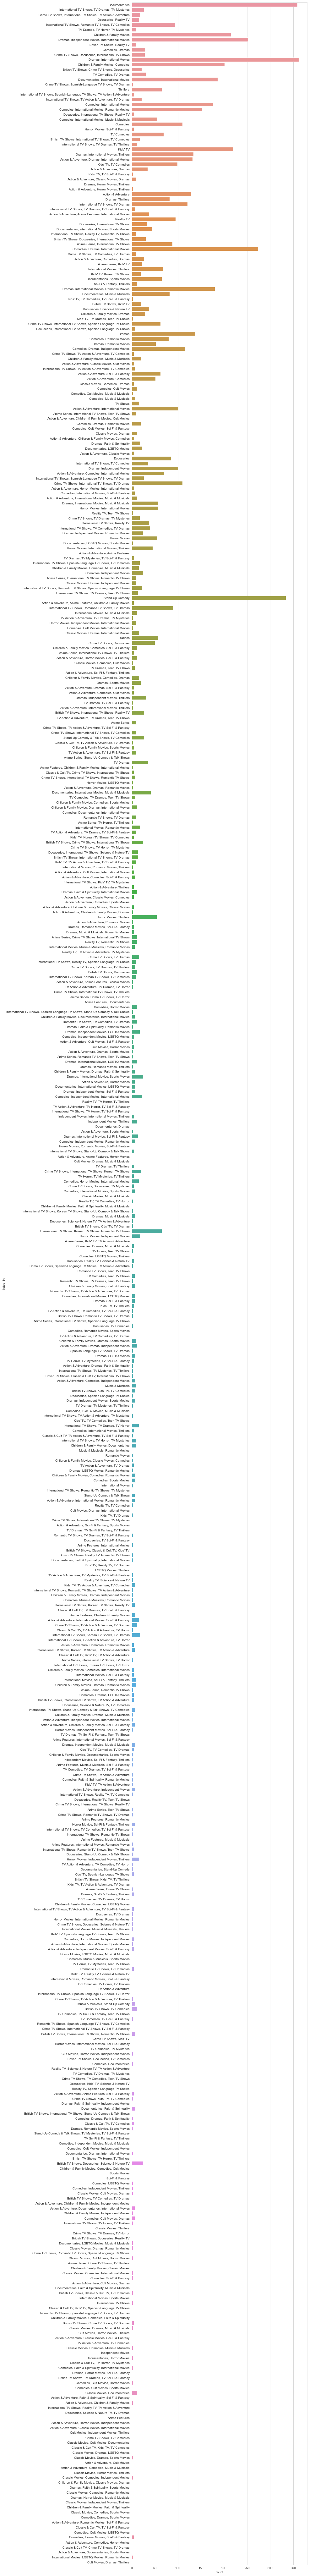

In [249]:
plt.figure(figsize = (10, 150)) 
sns.countplot(y='listed_in',data=df)

### Description

#### What are the description provide and find which genre is much showed? 

In [250]:
df['description'].unique()

array(['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.',
       'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
       'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.',
       ...,
       'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.',
       'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.',
       "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."],
      dtype=object)

In [251]:
df['description'].value_counts().head()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
On India's Independence Day, a zany mishap in a Mumbai chawl disrupts a young love story while compelling the residents to unite in aid of a little boy.     2
Name: description, dtype: int64

In [252]:
a1 = pd.DataFrame(df['description'])
a1.dropna().drop_duplicates(keep='first').head(10)

,description
0,"As her father nears the end of his life, filmm..."
1,"After crossing paths at a party, a Cape Town t..."
2,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo..."
4,In a city of coaching centers known to train I...
5,The arrival of a charismatic young priest brin...
6,Equestria's divided. But a bright-eyed hero be...
7,"On a photo shoot in Ghana, an American model s..."
8,A talented batch of amateur bakers face off in...
9,A woman adjusting to life after a loss contend...


In [253]:
a1.value_counts().count()

8775

In [254]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].apply(lambda time:time.year)
df['month'] = df['date_added'].apply(lambda time:time.month)

In [255]:
df

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,year,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,TV Show,Zombie Dumb,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


# Conclusion

Netfix is a huge platform of entertainment and this as created a new form of attraction towards web series . This help many new actors ,directors, cast and idea's to be noted.
As max infomation help us to find the kind of genres or content presented by netfix for people and display their ratings for easy attention.